# Glasma Results

### We read the files

In [5]:
# We create a list with the files to read

N = 10

file_list = ['/lustre/HQCD/carlos.lamas/qJetLFH_v3/output/mid_rapidity/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_30.000000_wy_30.000000_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_6_Nperp_64_Leta_12.374000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_63/pperp/evolution_Pperp_sq.dat' %n for n in range(N)]

In [6]:
#We read eache file into a dataframe of a list

import pandas as pd 

df_list = []
for i in range(N):
    df = pd.read_table(file_list[i], header = None)
    df_list.append(df)

In [1]:
for i in range(1, -10, -1):
    print(i)

1
0
-1
-2
-3
-4
-5
-6
-7
-8
-9


### We get the average $p_\perp$ as a function of $x^+$

In [7]:
# We compute the average p_perp and the deviation at every time step

import numpy as np 

s = np.zeros((N, len(np.array(df_list[0]))))


for i in range(N):
    arr = np.array(df_list[i])
    xplus = arr[:,0]
    
    
    for j in range(len(arr)):
        s[i, j] = arr[j, 1]
        
p_av = [np.average(s[:,j]) for j in range(len(np.array(df_list[0])))]
p_sigma = [np.std(s[:,j])/np.sqrt(N) for j in range(len(np.array(df_list[0])))]

p_av_p = [np.average(s[:,j])-s[0,0] for j in range(len(np.array(df_list[0])))]
        
print(xplus)
print (p_av)
print (p_sigma)

[ 0.        0.392825  0.785651  1.17848   1.5713    1.96413   2.35695
  2.74978   3.1426    3.53543   3.92825   4.32108   4.7139    5.10673
  5.49956   5.89238   6.28521   6.67803   7.07086   7.46368   7.85651
  8.24933   8.64216   9.03498   9.42781   9.82063  10.2135   10.6063
 10.9991   11.3919   11.7848   12.1776  ]
[219.121, 222.67109999999997, 224.6297, 226.9341, 228.11610000000002, 227.77699999999996, 227.2448, 226.82909999999998, 226.7205, 227.48960000000002, 226.5528, 225.9649, 225.9228, 227.93189999999998, 229.1424, 227.13060000000002, 226.56350000000003, 225.2304, 226.93560000000002, 226.5863, 227.5634, 226.6035, 227.4278, 227.24719999999996, 228.5459, 226.7567, 227.6578, 226.7973, 226.17759999999998, 226.80519999999996, 226.96389999999997, 225.96220000000002]
[0.0, 0.7026630266351002, 0.7886810261442838, 1.7436625444735563, 1.6749687307529058, 1.182529948880787, 0.8482565743924414, 1.082761750802087, 1.4261166449487914, 1.8765364648735179, 1.3214514883263784, 1.3471281486926

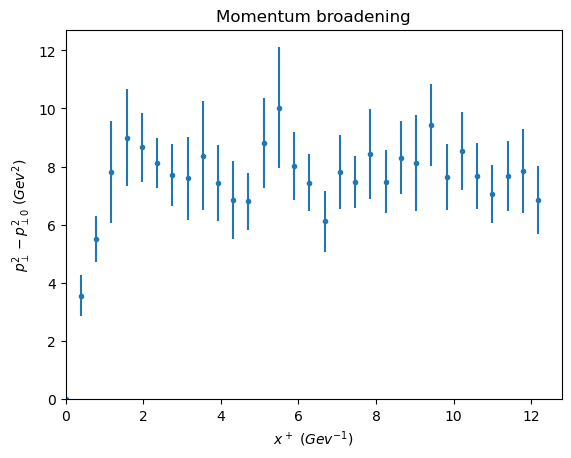

In [8]:
# We plot the results

import matplotlib.pyplot as plt 

plt.errorbar(xplus, p_av_p, p_sigma, fmt = '.')
plt.xlim(left=0); plt.ylim(bottom=0)
plt.xlabel(r'$x^+ \ (Gev^{-1})$'); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (Gev^2)$')
plt.title('Momentum broadening')
plt.savefig('Jets in Glasma Results/mid_rapidity/Momentum_broadening_w30.png')

In [65]:
# We save to file

np.savetxt('Jets in Glasma Results/up_lc/p_perp2_w20.txt', [xplus, p_av_p, p_sigma], fmt='%f')

### We get the average $\hat{q}$ as a function of $x^+$

In [66]:
# We compute the qhat at every time step

qhat = [(p_av[i]-p_av[i-1])/(xplus[i]-xplus[i-1]) for i in range(1, len(p_av))]
qhat_sigma = [np.sqrt((p_sigma[i]/(xplus[i]-xplus[i-1]))**2 + (p_sigma[i-1]/(xplus[i]-xplus[i-1]))**2) for i in range(1, len(p_av))]
xplus_q = [xplus[i] for i in range (1, len(p_av))] 

print(qhat)

[13.967797365238953, 6.456293626185659, 11.083703087093873, 4.053510513721356, 1.7391747066160557, -7.757242502927596, 7.241809434106373, -4.330736724199343, 0.7873634905683858, 2.8089201160837223, -0.39635465723085245, -0.20951071737692506, -1.2646691953262053, 7.599725071914019, -3.479710809021907, -0.26474556423898177, 3.4792016699760606, 2.7533538680854535, 1.640700575327104, -2.1523305246544338, 6.44697316837231, -1.4428633251024994, 0.7351967822412557, -9.264312807066684, 2.9657349422126953, 0.8705169648993629, -2.2067209775967394, 1.5043279022402978, -0.38823828920567577, -2.3993382540086894, -2.645112016293287]


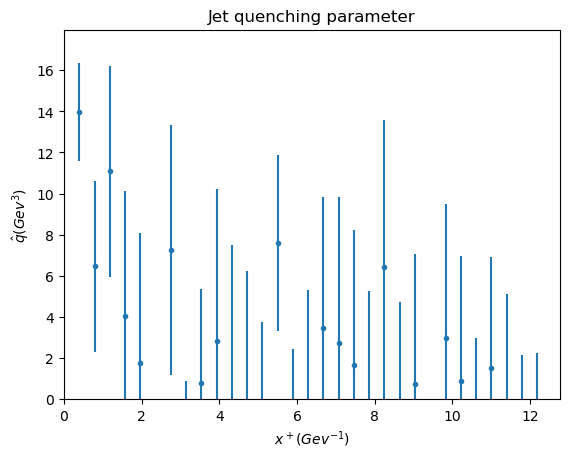

In [67]:
# We plot the results

plt.errorbar(xplus_q, qhat, qhat_sigma, fmt = '.')
plt.xlim(left=0); plt.ylim(bottom=0)
plt.xlabel(r'$x^+ (Gev^{-1})$'); plt.ylabel(r'$\hat{q} (Gev^3)$')
plt.title('Jet quenching parameter')
plt.savefig('Jets in Glasma Results/up_lc/qhat_w20.png')

In [68]:
# We save to file

np.savetxt('Jets in Glasma Results/up_lc/qhat_w20.txt', [xplus_q, qhat, qhat_sigma], fmt='%f')

### We compare with the classical results

In [46]:
import numpy as np

p_lc = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/up_lc/p_perp2_w2.txt'); q_lc = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/up_lc/qhat_w2.txt')
p_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/classical_results/momentum_broadening.txt'); q_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/classical_results/qhat.txt')

xplus = p_lc[0]; xplus_q = q_lc[0]
p_lc_dat = p_lc[1]; p_lc_sig = p_lc[2]; q_lc_dat = q_lc[1]; q_lc_sig = q_lc[2]

xplus_class = p_class[0]; xplus_class_q = q_class[0]
p_class_dat = p_class[1]; q_class_dat = q_class[1]

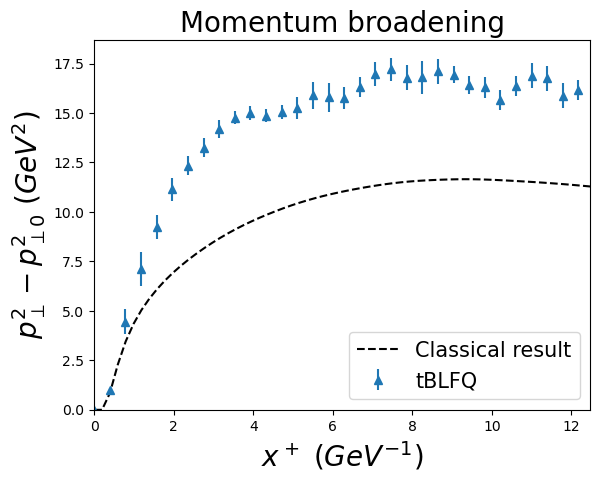

In [47]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.errorbar(xplus, p_lc_dat, p_lc_sig, fmt='^', label='tBLFQ')
plt.plot(xplus_class, p_class_dat, 'k--', label='Classical result')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Momentum broadening', fontsize=20)

plt.xlim(0, max(xplus_class)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

# plt.savefig('sensibility_to_lc/Momentum_broadening.png', bbox_inches='tight')

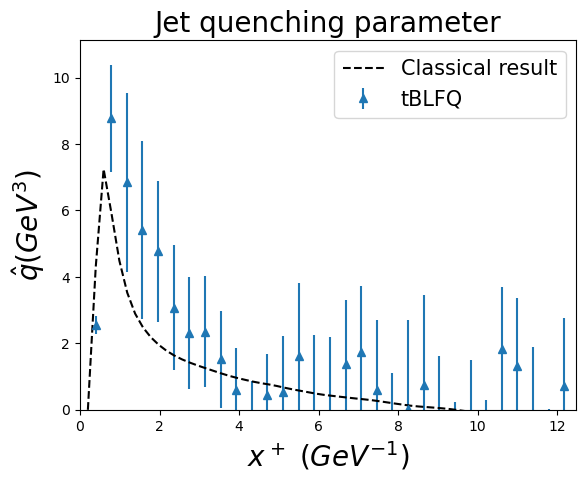

In [48]:
# We plot the qhat

plt.errorbar(xplus_q, q_lc_dat, q_lc_sig, fmt='^', label='tBLFQ')
plt.plot(xplus_class_q, q_class_dat, 'k--', label='Classical result')


plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} (GeV^3)$', fontsize=20)
plt.title('Jet quenching parameter', fontsize=20)

plt.xlim(0, max(xplus_class_q)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

# plt.savefig('sensibility_to_lc/qhat.png', bbox_inches='tight')

### We get the anisotropic broadening for every event and then average

In [49]:
# We create a list with the files to read

Nevents = 10
tlist = [0, 8, 16, 24, 32, 40, 48, 56]

file_list = [['/lustre/HQCD/carlos.lamas/qJetLFH_v3/output/up_lc/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_4.000000_wy_4.000000_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_6_Nperp_64_Leta_12.374000_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_63/pperp/Pperp_q_t_%i.dat' % (n, t) for t in tlist] for n in range(Nevents)]

In [50]:
# We convert to an array of DataFrames

import pandas as pd 
import numpy as np

df_list = []

for i in range(Nevents):
    df = [pd.read_table(file_list[i][t], header = None) for t in range(len(tlist))]
    df_list.append(df)

data = np.array(df_list)

In [51]:
# We create a vector with the probability of every value of p_y and other for every value of p_z at every time for every event

hbarc = 0.197326 
N = 128
L = 2.5/hbarc
a = L/N

Py = np.array([[[sum(data[n, t, :, y]) for y in range(N)] for t in range(len(tlist))] for n in range(Nevents)])
Pz = np.array([[[sum(data[n, t, z, 0:N]) for z in range(N)] for t in range(len(tlist))] for n in range(Nevents)])

In [52]:
# We compute the value of p^2 associated with every point

p2 = np.array([(n*2*np.pi/L)**2 for n in range (N//2)] + [((n-N)*2*np.pi/L)**2 for n in range(N//2, N)])

In [53]:
# We now multiply the probability by the corresponding value of the momentum squared

py2 = np.array([[[Py[n, t, y]*p2[y] for y in range(N)] for t in range(len(tlist))] for n in range(Nevents)])
pz2 = np.array([[[Pz[n, t, z]*p2[z] for z in range(N)] for t in range(len(tlist))] for n in range(Nevents)])

In [54]:
# We sum all the momentum modes

py2_tot = np.array([[sum(py2[n, t, :]) for t in range(len(tlist))] for n in range(Nevents)])
pz2_tot = np.array([[sum(pz2[n, t, :]) for t in range(len(tlist))] for n in range(Nevents)])

In [55]:
py2_av = [np.average(py2_tot[:,t]) for t in range(len(tlist))]
py2_sig = [np.std(py2_tot[:,t])/np.sqrt(Nevents) for t in range(len(tlist))]

pz2_av = [np.average(pz2_tot[:,t]) for t in range(len(tlist))]
pz2_sig = [np.std(pz2_tot[:,t])/np.sqrt(Nevents) for t in range(len(tlist))]

In [56]:
print(py2_av)
print(py2_sig)

print("################################")

print(pz2_av)
print(pz2_sig)

[1.9676069010024055, 7.9906842558739894, 9.758863110997694, 9.15594062162003, 9.34808912180399, 10.37167265734258, 10.106245917666802, 10.509794055822502]
[7.021666937153402e-17, 0.4433958186426457, 0.7616635166553107, 0.5552595148686678, 0.6804410615245684, 0.8592852538363003, 1.0136129959470876, 1.13949588316751]
################################
[1.9676069010024055, 8.697335292513477, 9.043482679325178, 9.169493924086083, 10.164537263421495, 10.66049232072463, 10.753821413349959, 10.407046661295315]
[7.021666937153402e-17, 0.7259889885498391, 0.6382500687767695, 0.3219606214059398, 0.7155229678159893, 0.7445502327983399, 0.7696285821558597, 0.7442649616059044]


In [57]:
# We subtract the initial momentum to every other

py2_dif = [py2_av[t]-py2_av[0] for t in range(len(tlist))]
pz2_dif = [pz2_av[t]-pz2_av[0] for t in range (len(tlist))]

# We compute xplus

xplus = [2*a*t for t in (tlist)]

# And compute the qhat

qy = np.diff(py2_av)/np.diff(xplus)
qz = np.diff(pz2_av)/np.diff(xplus)

# And the uncertainty of qhat

qy_sig = [np.sqrt((py2_sig[i]/(xplus[i]-xplus[i-1]))**2 + (py2_sig[i-1]/(xplus[i]-xplus[i-1]))**2) for i in range(1, len(py2_sig))]
qz_sig = [np.sqrt((pz2_sig[i]/(xplus[i]-xplus[i-1]))**2 + (pz2_sig[i-1]/(xplus[i]-xplus[i-1]))**2) for i in range(1, len(pz2_sig))]


In [58]:
# We save to file

np.savetxt('Jets in Glasma Results/up_lc/p_perp2_anisotropic.txt', [xplus, py2_dif, pz2_dif, py2_sig, pz2_sig], fmt='%f')
np.savetxt('Jets in Glasma Results/up_lc/qhat_anisotropic.txt', [xplus[1:len(xplus)], qy, qz, qy_sig, qz_sig], fmt='%f')

### We plot the anisotropic results

In [59]:
import numpy as np

p_lc = np.loadtxt('Jets in Glasma Results/up_lc/p_perp2_anisotropic.txt'); q_lc = np.loadtxt('Jets in Glasma Results/up_lc/qhat_anisotropic.txt')
p_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/classical_results/anisotropic_momentum_broadening.txt'); q_class = np.loadtxt('/lustre/HQCD/carlos.lamas/curraun/Jets in Glasma Results/classical_results/anisotropic_qhat.txt')

xplus = p_lc[0]; xplus_q = xplus[1:len(xplus)]

py2_lc = p_lc[1]; pz2_lc = p_lc[2]; py2_lc_sig = p_lc[3]; pz2_lc_sig = p_lc[4]
qy_lc = q_lc[1]; qz_lc = q_lc[2]; qy_lc_sig = q_lc[3]; qz_lc_sig = q_lc[4]

xplus_class = p_class[0]; xplus_class_q = q_class[0]
py2_class = p_class[1]; pz2_class = p_class[2]
qy_class = q_class[1]; qz_class = q_class[2]


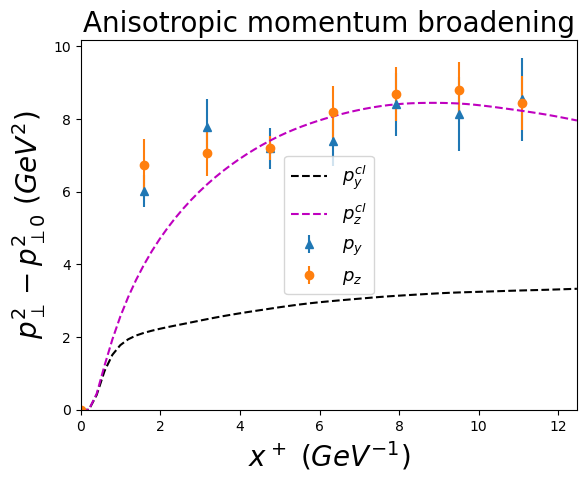

In [60]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.errorbar(xplus, py2_lc, py2_lc_sig, fmt='^', label=r'$p_y$')
plt.errorbar(xplus, pz2_lc, pz2_lc_sig, fmt='o', label=r'$p_z$')

plt.plot(xplus_class, py2_class, 'k--', label=r'$p_y^{cl}$')
plt.plot(xplus_class, pz2_class, 'm--', label=r'$p_z^{cl}$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Anisotropic momentum broadening', fontsize=20)

plt.xlim(0, max(xplus_class)); plt.ylim(bottom=0)
plt.legend(fontsize=13)

plt.savefig('Jets in Glasma Results/up_lc/anisotropic_momentum_broadening.png', bbox_inches='tight')

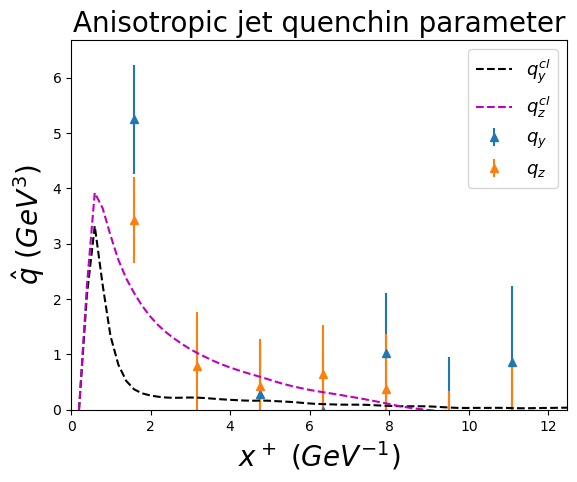

In [26]:
# We plot the qhat

import matplotlib.pyplot as plt

plt.errorbar(xplus_q, qy_lc, qy_lc_sig, fmt='^', label=r'$q_y$')
plt.errorbar(xplus_q, qz_lc, qz_lc_sig, fmt='^', label=r'$q_z$')

plt.plot(xplus_class_q, qy_class, 'k--', label=r'$q_y^{cl}$')
plt.plot(xplus_class_q, qz_class, 'm--', label=r'$q_z^{cl}$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} \ (GeV^3)$', fontsize=20)
plt.title('Anisotropic jet quenchin parameter', fontsize=20)

plt.xlim(0, max(xplus_class_q)); plt.ylim(bottom=0)
plt.legend(fontsize=13)

plt.savefig('Jets in Glasma Results/up_lc/anisotropic_qhat.png', bbox_inches='tight')

In [34]:
# We check in the sum gives the same

p_tot = [py2_temp[t] + pz2_temp[t] for t in range(len(tlist))]
dat = np.loadtxt('Jets in Glasma Results/temp_gauge/p_perp2.txt')
p_comp = dat[1]; x2 = dat[0]


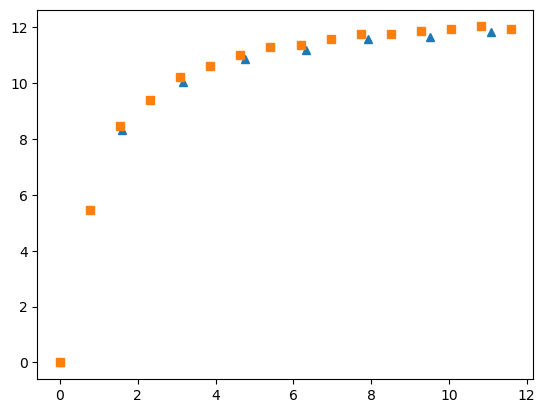

In [35]:
plt.plot(xplus, p_tot, '^')
plt.plot(x2, p_comp, 's')

### We plot the ratio $q_y/q_z$ for the LC gauge and temporal gauge background fields

In [13]:
import numpy as np

q_lc = np.loadtxt('Jets in Glasma Results/anisotropic_python/qhat_LC.txt')
q_temp = np.loadtxt('Jets in Glasma Results/anisotropic_python/qhat_temp.txt')
q_class = np.loadtxt('classical_results/anisotropic_qhat.txt')

xplus_q = q_lc[0]

qy_lc = q_lc[1]; qz_lc = q_lc[2]; qy_lc_sig = q_lc[3]; qz_lc_sig = q_lc[4]
qy_temp = q_temp[1]; qz_temp = q_temp[2]; qy_temp_sig = q_temp[3]; qz_temp_sig = q_temp[4]

xplus_class_q = q_class[0]
qy_class = q_class[1]; qz_class = q_class[2]

In [17]:
# We compute the ratios and the uncertainties

r_lc = [qy_lc[i]/qz_lc[i] for i in range(len(qy_lc))]
r_temp = [qy_temp[i]/qz_temp[i] for i in range(len(qy_temp))] 

r_lc_sig = [np.sqrt((qy_lc_sig[i]/qz_lc[i])**2 + (qy_lc[i]*qz_lc_sig[i]/qz_lc[i]**2)**2) for i in range(len(qy_lc))]
r_temp_sig = [np.sqrt((qy_temp_sig[i]/qz_temp[i])**2 + (qy_temp[i]*qz_temp_sig[i]/qz_temp[i]**2)**2) for i in range(len(qy_temp))]


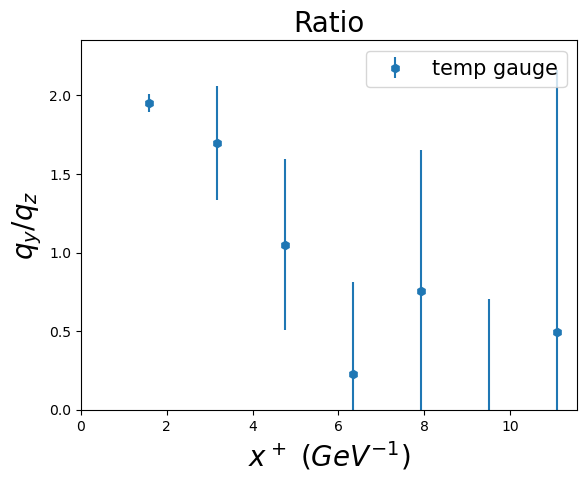

In [22]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

# plt.errorbar(xplus_q, r_lc, r_lc_sig, fmt='^', label='LC gauge')
plt.errorbar(xplus_q, r_temp, r_temp_sig, fmt='h', label='temp gauge')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$q_y/q_z$', fontsize=20)
plt.title('Ratio', fontsize=20)

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('Jets in Glasma Results/temp_gauge/qhat_ratio.png', bbox_inches='tight')